# Introduction to Bayesian RL

Baye's Rule: $$p(\theta|X) = \frac{p(X|\theta)*p(\theta)}{p(X)}$$

$X = X_{1:n}$ denotes the evidence (eg. rewards you get through playing with a bandit for n trials)
<br>$\theta$ denotes the parameter(s) you are interested in (eg. mean of the normal distribution that the rewards are drawn from)
<br>Essentially, you want to find out the parameter(s) given the evidence

Terms in Bayesian Inference:
<br>Prior $p(\theta)$: the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account
<br>Likelihood $p(X|\theta)$: the probability of oberserving an event given the prior.
<br>Posterior $p(\theta|X)$: the conditional probability that is assigned[clarification needed] after the relevant evidence or background is taken into account. 

### Example 1: A Gaussian Bandit

Gaussian Probability Density Function:
$$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi{\sigma}^2}}\cdot e^{-{{(x-\mu)}^2/2\sigma^2}}$$

In [13]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
rewards_tot = np.around(np.random.normal(4, 1, 20));
s = 1; #known standard deviation
mu = rewards_tot[0];
mu_tot = [];
for n in np.arange(0,20):
    x = rewards_tot[0:n]
    mu = 1/(1/s**2+n)*(mu/s**2 + np.sum(x))
    print(mu)
    s = np.sqrt(1/(1/s**2+n))


3.0
3.0
3.250000000000001
3.428571428571429
3.545454545454546
3.75
3.909090909090909
4.0
4.027027027027027
4.043478260869565
4.017857142857142
4.014925373134328
4.025316455696202
4.0434782608695645
4.066037735849056
4.09090909090909
4.094890510948904
4.103896103896103
4.110465116279069
4.120418848167538


For more information about the math: http://www.ams.sunysb.edu/~zhu/ams570/Bayesian_Normal.pdf

### Example 2: A Bernoulli Bandit

$$X_i=
    \begin{cases}
      0& \text{with probability p} \\
      1& \text{with probability 1-p}
    \end{cases}$$
<center>Then $E[X_{1:n}] \sim Binomial(n,p)$</center>

Beta probability density function: $$f(x; \alpha, \beta) = \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}}
\cdot x^{\alpha-1}\cdot (1-x)^{\beta-1}$$
<center>For positive integer n, $\Gamma{(n)} = (n-1)!$</center>

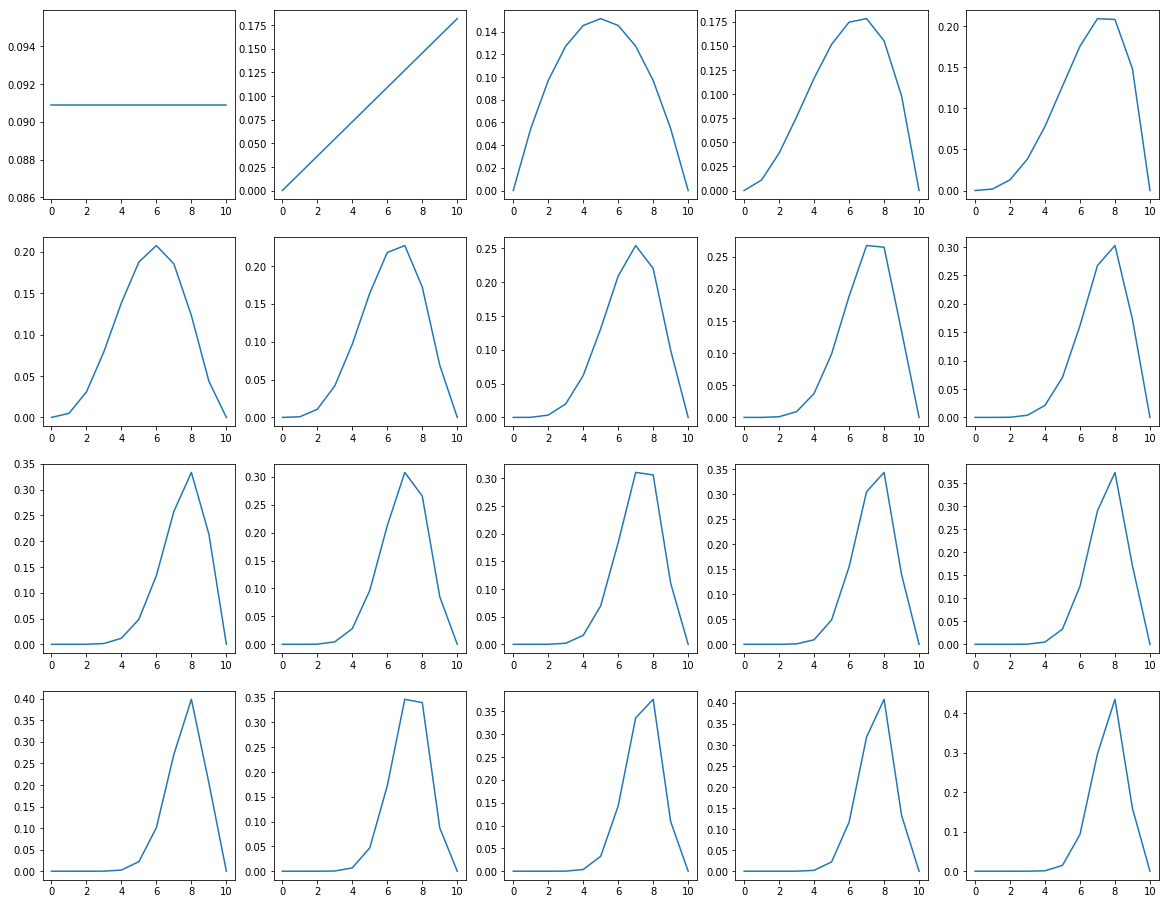

In [103]:
rewards_tot = np.random.binomial(1,0.8,20)
prob = [];
theta = [];
t = 0;
tot = np.arange(0,1.1,0.1)
fig, axes = plt.subplots(4,5,figsize=(20,16))
for n in np.arange(0,20):
    reward = rewards_tot[n];
    if reward > 0:
        t = t+1;
    posterior = ss.beta.pdf(tot, 1+t, 1+n-t)/np.sum(ss.beta.pdf(tot, 1+t, 1+n-t));
#     [p, idx] = np.max(posterior);
#     prob[n] = p;
#     theta[n] = tot[idx];
    axes[np.floor_divide(n,5), np.remainder(n,5)].plot(posterior)
plt.show()

For more information about the math: https://en.wikipedia.org/wiki/Beta-binomial_distribution

### Compare Bayesian RL with Rescorla-Wagnar Model

Difference between Bayesian RL and Rescorla-Wagnar model:
<br>In RW where $Q_{t+1} = Reward + \alpha * (Reward - Q_t)$. The Q-value here is determinstic.
<br>In Bayesian, the Posterior is probablistic. It integrates value with uncertainty.

In [184]:
k = 50
bandit0 = np.random.binomial(1,0.8,k)
bandit1 = 2*np.random.binomial(1,0.4,k)
bandit2 = np.random.binomial(1,0.6,k)
bandit2 = 2*np.random.binomial(1,0.3,k)
reward_matrix = [bandit0, bandit1, bandit2, bandit2]

In [201]:
choice_tot = []
choice = np.random.randint(0,4)
reward_tot = []
tot = np.arange(0,1.1,0.1)
value = np.zeros(4)
n = np.zeros(4)
t = np.zeros(4)
prob = np.zeros(4)
posterior = np.zeros((4,len(tot)))
for i in np.arange(0,k):
    reward = reward_matrix[choice][i]
    choice_tot.append(choice)
    reward_tot.append(reward)
    n[choice] = n[choice] + 1
    if reward > 0:
        t[choice] = t[choice] + 1
    posterior[choice,:] = ss.beta.pdf(tot, 1+t[choice], 1+n[choice]-t[choice])/np.sum(ss.beta.pdf(tot, 1+t[choice], 1+n[choice]-t[choice]));
    prob[choice] = tot[np.argmax(posterior[choice])]
    value[choice] = prob[choice] * reward
    choice_prob = np.exp(np.max(value))/np.sum(np.exp(value))
    if np.random.rand() > choice_prob:
        choice = np.argmax(value)
    else:
        choice = np.random.randint(0,4)
        

Here I used a softmax decision method. For more decision methods such as Thompson sampling and UCB, see: https://gdmarmerola.github.io/ts-for-bernoulli-bandit/

In [202]:
reward_tot

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1]

In [203]:
choice_tot

[3,
 2,
 3,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 3,
 0,
 1,
 3,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 3,
 0]

In [204]:
tot[np.argmax(posterior, axis=1)]

array([0.8, 0. , 0. , 0.3])

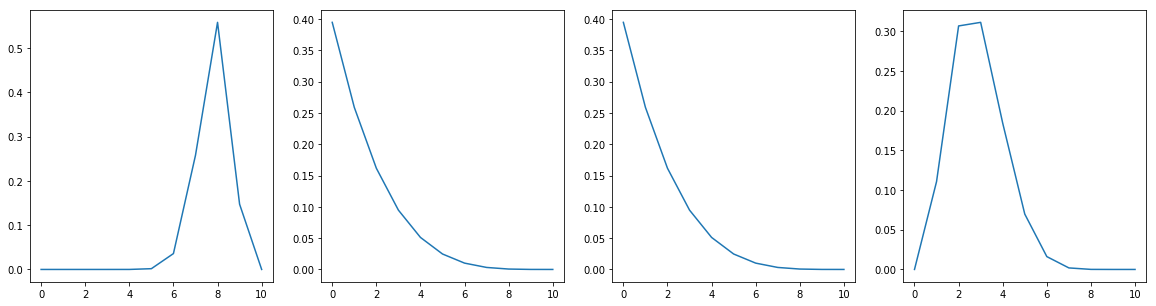

In [205]:
fig, axes = plt.subplots(1,4, figsize=(20,5))
for j in [0,1,2,3]:
    axes[j].plot(posterior[j])
plt.show()